In [1]:
pip install pyinterval

     |████████████████████████████████| 1.6 MB 7.9 MB/s 
  Created wheel for pyinterval: filename=pyinterval-1.2.0-py3-none-any.whl size=11252 sha256=005b358fb1071ad32d813fc8b278f8049d5d87b2619d46d3a4c6636af85306d0
  Stored in directory: /root/.cache/pip/wheels/a6/ed/f4/e07254c0a9e77e7645b2bcc55bd84c1fe0da57bdeafb3fdb86
  Created wheel for crlibm: filename=crlibm-1.0.3-cp37-cp37m-linux_x86_64.whl size=175315 sha256=519ae262390dafd8662d06aa33b27123ba85501acc2b4ae0b7c9228248b56aad
  Stored in directory: /root/.cache/pip/wheels/d5/49/76/c2047e63fe9162b0b156dd4c0656b5ee1e3d8a2d6cfc56132c
Successfully built pyinterval crlibm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from random import uniform
from tabulate import tabulate
from scipy.optimize import minimize_scalar
from interval import interval

Funkcja wyliczająca obraz przedziału $[a,b]$ przez funkcje $f$:

In [ ]:
def obraz(f, a, b):
    '''
    obraz przedzialu [a,b] przez funkcje f
    f - funkcja
    a - poczatek przedzialu
    b - koniec przedzialu
    '''
    def g(x): #funkcja pomocnicza
        return -f(x)
    min = minimize_scalar(f, method='bounded',
                          bounds=(float(a), float(b)))
    max = minimize_scalar(g, method='bounded',
                          bounds=(float(a), float(b)))
    return interval[f(min.x), f(max.x)]

In [ ]:
begin = lambda interval: interval[0][0] #zwraca poczatek przedzialu 
end = lambda interval: interval[0][1] #zwraca koniec przedzialu

Funkcja Przedziałowej Metody Newtona:

\begin{equation}
\begin{cases}
    X^{(0)}=[x_{1}^{(0)},x_{2}^{(0)}] = [a,b], \\
X^{(k+1)}=\left( m(X^{(k)})-f(m(X^{(k)}))/M\right)\cap X^{(k)}, \quad \text{dla } k\geqslant 0
\end{cases}
\end{equation}

gdzie:
$ M = [m_{1}, m_{2}]$
\begin{equation}  
    0 < m_{1} \leq \frac{f(x)-f(\xi)}{x-\xi}=\frac{f(x)}{x-\xi}\leq m_{2},
\end{equation}

$X^{(k)} = [x_{1}^{(k)}, x_{2}^{(k)}]$

In [ ]:
def przedzial_newton(f, df, a, b, il_iteracji, czy_m_los):
    '''
    przedzialowa metoda newtona
    f - funkcja
    df - pochodna funkcji f
    a - poczatek przedzialu X^0
    b - koniec przedzialu X^0
    il_iteracji - ilosc iteracji
    czy_m_los - sposob doboru punktu m(X^k), 
                  True - punkt m(X^k) losowy
                  False - punkt m(X^k) srodkowy
    '''
    x1, x2, d_X_k, ilorazy = [a], [b], [b-a], [0]
    k = 0
    M = obraz(df, a, b)  #interval[20, 540]
    while k != il_iteracji:
        if czy_m_los == True: m = uniform(x1[k], x2[k])
        elif czy_m_los == False: m = (x1[k] + x2[k]) / 2
        else: return 0
        if f(m) >= 0:
            x1.append(max(x1[k], m - f(m) / begin(M)))
            x2.append(m - f(m) / end(M))
        else:
            x1.append(m - f(m) / end(M))
            x2.append(min(x2[k], m - f(m) / begin(M)))
        d_X_k.append(x2[k+1] - x1[k+1])
        if d_X_k[k] <= 0: break 
        ilorazy.append(d_X_k[k+1] / d_X_k[k])
        k += 1
    return x1, x2, d_X_k, ilorazy, 1-begin(M)/end(M)

Definiowanie funkcji oraz jej pochodnej dla której będziemy przeprowadzać obliczenia z wykresami

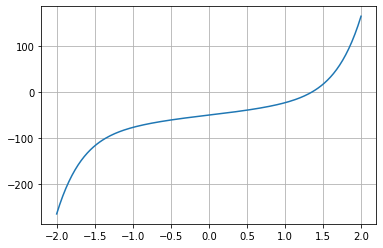

In [ ]:
def f(x):
    return x ** 7 + 6 * x ** 3 + 20 * x - 50

x_ = np.linspace(-2,2,200)  # tworzenie jej wykresu
plt.plot(x_, f(x_))
pylab.grid(True)
plt.show()

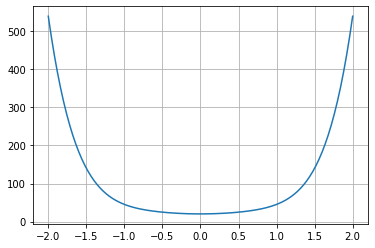

In [ ]:
def df(x):
    return 7 * x ** 6 + 18 * x ** 2 + 20
  
x1_ = np.linspace(-2,2,200)  # tworzenie jej wykresu
plt.plot(x1_, df(x1_))
pylab.grid(True)
plt.show()

Sytuacje gdy $m(X^{(k)})$ jest dowolnie wybranym punktem z przedziału $X^{(k)}$

In [ ]:
a,b,c,d,e = przedzial_newton(f, df, 0, 2, 10, True)
print(tabulate({"x_1": a, "x_2": b, "d_X_k": c, "d_X_k/d_X_k-1": d}, headers="keys", floatfmt=".8f",))
print("1-m_1/m_2 = " + str(e))

       x_1         x_2       d_X_k    d_X_k/d_X_k-1
----------  ----------  ----------  ---------------
0.00000000  2.00000000  2.00000000       0.00000000
0.79480543  2.00000000  1.20519457       0.60259729
0.85421605  2.00000000  1.14578395       0.95070454
1.15603700  1.95849714  0.80246013       0.70035903
1.15603700  1.57756857  0.42153156       0.52529907
1.34574723  1.37304723  0.02730000       0.06476384
1.34574723  1.36755955  0.02181232       0.79898594
1.34574723  1.36384812  0.01810089       0.82984725
1.34574723  1.35979758  0.01405035       0.77622414
1.34966832  1.35534576  0.00567744       0.40407829
1.35007572  1.35348877  0.00341305       0.60116080
1-m_1/m_2 = 0.9629625739943007


Teraz rozważmy sytuacje gdy:

$m(X^{(k)})$ jest środkiem przedziału $X^{(k)}$:

$m(X^{(k)}) = (x_{1}^{(k)} + x_{2}^{(k)})/2 $

In [ ]:
a1,b1,c1,d1,e1 = przedzial_newton(f, df, 0, 2, 10, False)
print(tabulate({"x_1": a1, "x_2": b1, "d_X_k": c1, "d_X_k/d_X_k-1": d1}, headers="keys", floatfmt=".8f",))
print("1-m_1/m_2 = " + str(e1))

       x_1         x_2       d_X_k    d_X_k/d_X_k-1
----------  ----------  ----------  ---------------
0.00000000  2.00000000  2.00000000       0.00000000
1.04259304  2.00000000  0.95740696       0.47870348
1.04259304  1.48350204  0.44090900       0.46052412
1.27697660  1.48350204  0.20652544       0.46840831
1.27697660  1.37482383  0.09784723       0.47377812
1.33014521  1.37482383  0.04467862       0.45661609
1.34390409  1.35216672  0.00826263       0.18493474
1.34850232  1.35216672  0.00366440       0.44349089
1.35039702  1.35202183  0.00162482       0.44340575
1.35039702  1.35111741  0.00072040       0.44337031
1.35043022  1.35074510  0.00031488       0.43709878
1-m_1/m_2 = 0.9629625739943007


Porównanie wartości szerokości przedziałów powyższych dwóch sposobów:

In [ ]:
c1c = [c[element]/c1[element] for element in range(len(c))]
print(tabulate({"d1_X_k z losowym m(X_k)": c, "d2_X_k z srodkowym m(X_k)": c1, "d1_X_k/d2_X_k": c1c}, headers="keys", floatfmt=".8f",))

  d1_X_k z losowym m(X_k)    d2_X_k z srodkowym m(X_k)    d1_X_k/d2_X_k
-------------------------  ---------------------------  ---------------
               2.00000000                   2.00000000       1.00000000
               0.50102403                   0.95740741       0.52331330
               0.39419119                   0.44090968       0.89404068
               0.16698024                   0.20652591       0.80851957
               0.13697670                   0.09784753       1.39989951
               0.09906735                   0.04467880       2.21732356
               0.07740976                   0.00826248       9.36882402
               0.06170414                   0.00366434      16.83907968
               0.02780617                   0.00162479      17.11372223
               0.00039453                   0.00072038       0.54766716
               0.00018202                   0.00031488       0.57806438


ilość iteracji potrzebna do obliczenia $\xi$ z zadaną dokładnością $\varepsilon = 10^{-2}$

In [ ]:
k1 = ((-2) * np.log(10) - np.log(2))/np.log(1-1/27)
k2 = (np.log(0.01) - np.log(2))/(np.log(1-1/27) - np.log(2))
print("dla losowego m(X_k) ilość iteracji większa od: " + str(k1))
print("dla środkowego m(X_k) ilość iteracji większa od: " + str(k2))

dla losowego m(X_k) ilość iteracji większa od: 140.38874725614812
dla środkowego m(X_k) ilość iteracji większa od: 7.249155724540377


Metody kwadratowo zbieżne:
\begin{equation}
\begin{cases}
    X^{(0)}=[x_{1}^{(0)},x_{2}^{(0)}], \\
X^{(k+1)}=\left( m(X^{(k)})-f(m(X^{(k)}))/M^{(k)}\right)\cap X^{(k)}, \quad \text{dla } k\geqslant 0.
\end{cases}
\end{equation}
gdzie $M^{(k)} = F'(X^{(k)}) \cap M$

In [ ]:
def metoda_kwadr_zbiezna(f, df, a, b, il_iteracji, formula):
    '''
    metoda kwadratowo zbiezna z wyborem punktu m(X_k)=(x_1+x_2)/2
    f - funkcja
    df - pochodna funkcji f
    a - początek przedziału X_0
    b - koniec przedziału X_0
    il_iteracji - ilosc iteracji
    formula - formula przy pomocy ktorej wyliczamy rozszerzenie przedzialowe
    '''
    x1, x2, d_X_k, ilorazy = [a], [b], [b-a], [0]
    M = obraz(df, a, b)  #interval[20, 540]
    M_k, roznice = [M], [1-begin(M)/end(M)]
    k = 0
    while k != il_iteracji:
        m = (x1[k] + x2[k]) / 2     #m - środek przedziału X_k 
        M_k.append(formula(interval[x1[k], x2[k]]) & M) # M_k - przedział df(X^k) & df([a,b])
        if f(m) >= 0:
            x1.append(max(x1[k], m - f(m) / begin(M_k[k+1])))
            x2.append(m - f(m) / end(M_k[k+1]))
        else:
            x1.append(m - f(m) / end(M_k[k+1]))
            x2.append(min(x2[k], m - f(m) / begin(M_k[k+1])))
        d_X_k.append(x2[k+1] - x1[k+1])
        ilorazy.append(d_X_k[k+1] / d_X_k[k])
        roznice.append(1-begin(M_k[k+1])/end(M_k[k+1]))
        if d_X_k[k] <= 0.000001:
            break
        k += 1
    return x1, x2, d_X_k, ilorazy, M_k, roznice

Definiowanie formuły:

In [ ]:
def formula1(x):
    return 7 * x ** 6 + 18 * x ** 2 + 20

Rezultaty:

In [ ]:
a2,b2,c2,d2,e2,f2 = metoda_kwadr_zbiezna(f, df, 0, 2, 10, formula1)
M_k_begin = [e2[element][0][0] for element in range(len(e2))]
M_k_end = [e2[element][0][1] for element in range(len(e2))]
print(tabulate({"x_1": a2, "x_2": b2, "d(X_k)": c2, "d(X_k)/d(X_k-1)": d2,},
               headers="keys", floatfmt=".8f",) + "\n")
print(tabulate({"M_k_begin": M_k_begin, "M_k_end": M_k_end, "1-m_1/m_2": f2},
               headers="keys", floatfmt=".8f",))

       x_1         x_2      d(X_k)    d(X_k)/d(X_k-1)
----------  ----------  ----------  -----------------
0.00000000  2.00000000  2.00000000         0.00000000
1.04259304  2.00000000  0.95740696         0.47870348
1.10098662  1.48350204  0.38251542         0.39953273
1.33091094  1.38785095  0.05694000         0.14885675
1.35015284  1.35137842  0.00122558         0.02152402
1.35068852  1.35068875  0.00000024         0.00019175
1.35068863  1.35068863  0.00000000         0.00000002

  M_k_begin       M_k_end    1-m_1/m_2
-----------  ------------  -----------
20.00000000  539.99432890   0.96296257
20.00000000  539.99432890   0.96296257
48.55656909  539.99432890   0.91007948
54.28690038  134.22914275   0.59556547
90.78763052  104.69164701   0.13280922
95.21533697   95.50640151   0.00304759
95.34241967   95.34247547   0.00000059


Sytuacja, gdy 
\begin{equation*}
        M^{(k)}=f'(Y^{(k)})\cap M,
  \end{equation*}
gdzie
\begin{equation}
 Y^{(k)}= \begin{cases}
 [x_{1}^{(k)},m(X^{(k)})], & f(m(X^{(k)}))>0\\
 [m(X^{(k)}),x_{2}^{(k)}], & f(m(X^{(k)}))<0\\
 X^{(k)}, & \text{w przeciwnym przypadku}.
 \end{cases}
\end{equation}

In [ ]:
def metoda_kwadr_zbiezna2(f, df, a, b, il_iteracji, formula):
    '''
    metoda kwadratowo zbiezna z uzyciem przedzialow Y_k
    f - funkcja
    df - pochodna funkcji f
    a - początek przedziału X_0
    b - koniec przedziału X_0
    il_iteracji - ilosc iteracji
    formula - formula przy pomocy ktorej wyliczamy rozszerzenie przedzialowe
    '''
    x1, x2, d_X_k, ilorazy = [a], [b], [b-a], [0]
    M = obraz(df, a, b)  #interval[20, 540]
    k = 0
    while k != il_iteracji:
        m = (x1[k] + x2[k]) / 2
        if f(1) > 0: 
            y1, y2 = x1[k], m
        elif f(m) < 0:
            y1, y2 = m, x2[k]
        else:
            y1, y2 = x1[k], x2[k]
        M_k = formula(interval[y1, y2]) & M
        if f(m) >= 0:
            x1.append(max(x1[k], m - f(m) / begin(M_k)))
            x2.append(m - f(m) / end(M_k))
        else:
            x1.append(m - f(m) / end(M_k))
            x2.append(min(x2[k], m - f(m) / begin(M_k)))
        d_X_k.append(x2[k+1] - x1[k+1])
        ilorazy.append(d_X_k[k+1] / d_X_k[k])
        if d_X_k[k] <= 0.000001:
            break
        k += 1
    return x1, x2, d_X_k, ilorazy

Rezultaty:

In [ ]:
a3,b3,c3,d3 = metoda_kwadr_zbiezna2(f, df, 0, 2, 10, formula1)
print(tabulate({"x_1": a3, "x_2": b3, "d_X_k": c3, "d_X_k/d_X_k-1": d3}, headers="keys", floatfmt=".8f",))

       x_1         x_2       d_X_k    d_X_k/d_X_k-1
----------  ----------  ----------  ---------------
0.00000000  2.00000000  2.00000000       0.00000000
1.04259304  1.51111111  0.46851807       0.23425904
1.32143156  1.35766612  0.03623456       0.07733866
1.35034621  1.35084387  0.00049766       0.01373432
1.35068858  1.35068864  0.00000006       0.00011651
1.35068863  1.35068863  0.00000000       0.00000002
